# Major Project on COVID-19 Pandemic Analysis

# Allotted state - Arunachal Pradesh

Importing of all packages required for the Project 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date,datetime
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline

# Importing data sets for Question A,B and C

In [2]:
df = pd.read_csv("state_level_daily.csv")
df1 = pd.read_csv("complete.csv")
df2 = pd.read_csv("statewise_tested_numbers_data.csv")


Preparing data

In [3]:
df1=df1.drop(["New cases","New deaths","New recovered"],axis=1)
df1=df1.rename(columns={"Name of State / UT":"State","Total Confirmed cases":"Tot_Cases","Cured/Discharged/Migrated":"Recovered"})
df['Date']=pd.to_datetime(df['Date'],format='%d-%b-%y')
df1['Date']=pd.to_datetime(df1['Date'],format='%Y-%m-%d')
df2['Updated On']=pd.to_datetime(df2['Updated On'],format='%d/%m/%Y')
date_from = pd.Timestamp(date(2020,6,1))
df_filtered = df[(df['State_Name']=="Arunachal Pradesh") & (df['Date']>=date_from) ]
df_testing = df2[(df2['State']=="Arunachal Pradesh") & (df2['Updated On']>=date_from) ]
df_complete = df1[(df1['State']=="Arunachal Pradesh") & (df1['Date']>=date_from) ]

In [4]:
df_filtered=df_filtered.drop(["Unnamed: 0","State"], axis=1)
df_testing=df_testing.drop(["Tag (Total Tested)","Negative","Unconfirmed","Cumulative People In Quarantine","Total People Currently in Quarantine",
                     "Corona Enquiry Calls","Num Calls State Helpline","Source1","Source2","Unnamed: 22","Test positivity rate","Tests per thousand",
                     "Tests per million","Tests per positive case"], axis=1)

In [5]:
df_filtered.head()

,Date,Confirmed,Deceased,Recovered,State_Name
41,2020-07-01,4,0,4,Arunachal Pradesh
80,2020-06-01,18,0,0,Arunachal Pradesh
197,2020-07-02,37,0,5,Arunachal Pradesh
236,2020-06-02,2,0,0,Arunachal Pradesh
353,2020-07-03,20,0,4,Arunachal Pradesh


In [6]:
df_testing.head()

,Updated On,State,Total Tested,Positive,Tag (People in Quarantine),Total People Released From Quarantine,People in ICU,People on Ventilators,Num Isolation Beds,Num ICU Beds,Num Ventilators,Total PPE,Total N95 Masks,Population NCP 2019 Projection
195,2020-06-01,Arunachal Pradesh,8768.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504000.0
196,2020-06-02,Arunachal Pradesh,9079.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504000.0
197,2020-06-03,Arunachal Pradesh,9551.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504000.0
198,2020-06-04,Arunachal Pradesh,10025.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504000.0
199,2020-06-05,Arunachal Pradesh,10790.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504000.0


In [7]:
df_testing=df_testing.drop(["Positive","Tag (People in Quarantine)","Total People Released From Quarantine","People in ICU",
                     "People on Ventilators","Num Isolation Beds","Num ICU Beds","Num Ventilators","Total PPE",
                            "Total N95 Masks"], axis=1)
df_testing=df_testing.rename(columns={"Population NCP 2019 Projection":"Population","Updated On":"Date","Total Tested":"Tests"})
df_filtered=df_filtered.rename(columns={"State_Name":"State"})


In [8]:
df_testing.head()

,Date,State,Tests,Population
195,2020-06-01,Arunachal Pradesh,8768.0,1504000.0
196,2020-06-02,Arunachal Pradesh,9079.0,1504000.0
197,2020-06-03,Arunachal Pradesh,9551.0,1504000.0
198,2020-06-04,Arunachal Pradesh,10025.0,1504000.0
199,2020-06-05,Arunachal Pradesh,10790.0,1504000.0


In [9]:

df_filtered.head()

,Date,Confirmed,Deceased,Recovered,State
41,2020-07-01,4,0,4,Arunachal Pradesh
80,2020-06-01,18,0,0,Arunachal Pradesh
197,2020-07-02,37,0,5,Arunachal Pradesh
236,2020-06-02,2,0,0,Arunachal Pradesh
353,2020-07-03,20,0,4,Arunachal Pradesh


Joining of dataframes for consolidated data

In [10]:
df_filtered=pd.merge(df_filtered, df_testing, on=['State','Date'] , how='left')
df_filtered=pd.merge(df_complete,df_filtered,  on=['State','Date'] , how='left')

In [11]:
df_filtered.sort_values(by=['Date'],inplace=True)

Caliculating Active cases

In [12]:
df_filtered['Active']=df_filtered['Tot_Cases']-df_filtered['Death']-df_filtered['Recovered_x']

# Plotting data for present state of Arunachal Pradesh
# Question A

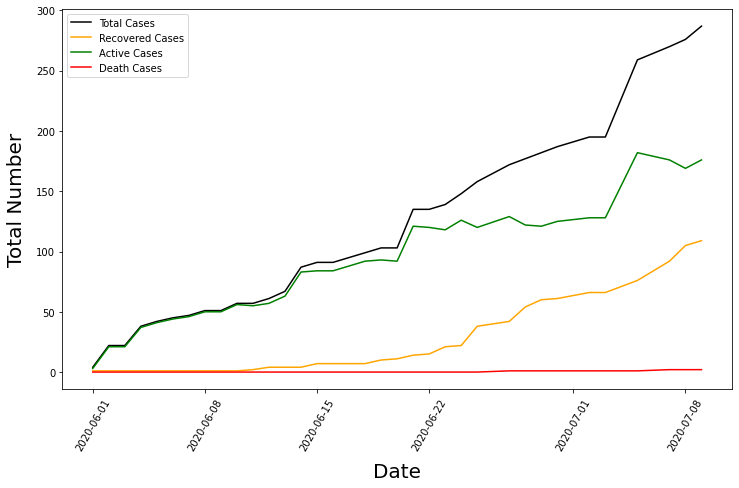

In [13]:
plt.figure(figsize=(12, 7)) 
plt.plot(df_filtered.Date,df_filtered.Tot_Cases,color='k',label='Total Cases')
plt.plot(df_filtered.Date,df_filtered.Recovered_x,color='orange',label='Recovered Cases')
plt.plot(df_filtered.Date,df_filtered.Active,color='green',label='Active Cases')
plt.plot(df_filtered.Date,df_filtered.Death,color='red',label='Death Cases')
plt.xticks(rotation=60)
plt.xlabel("Date",labelpad=10,fontsize=20)
plt.ylabel("Total Number",labelpad=10,fontsize=20)
plt.legend()

plt.show()

Finding Null values in the dataframe

In [14]:
md=df_filtered.isnull()

In [15]:
for column in md.columns.values.tolist():
    print(column)
    print (md[column].value_counts())
    print("") 

Date
False    35
Name: Date, dtype: int64

State
False    35
Name: State, dtype: int64

Latitude
False    35
Name: Latitude, dtype: int64

Longitude
False    35
Name: Longitude, dtype: int64

Tot_Cases
False    35
Name: Tot_Cases, dtype: int64

Death
False    35
Name: Death, dtype: int64

Recovered_x
False    35
Name: Recovered_x, dtype: int64

Confirmed
False    34
True      1
Name: Confirmed, dtype: int64

Deceased
False    34
True      1
Name: Deceased, dtype: int64

Recovered_y
False    34
True      1
Name: Recovered_y, dtype: int64

Tests
False    33
True      2
Name: Tests, dtype: int64

Population
False    31
True      4
Name: Population, dtype: int64

Active
False    35
Name: Active, dtype: int64



Finding NaN values in Heatmap using different colour code

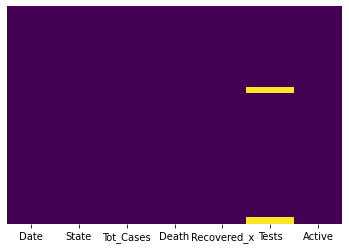

In [16]:
hm_df=df_filtered.drop(["Latitude","Longitude","Population","Confirmed","Deceased","Recovered_y"], axis=1)
sns.heatmap(hm_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')



Replacing NaN values with mean

In [17]:

hm_df['Tests'] = hm_df['Tests'].fillna(hm_df['Tests'].mean())

#hm_df['Population'] = hm_df['Population'].fillna(hm_df['Population'].mean())

In [18]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10


Again Checking for NaN values in the Heatmap

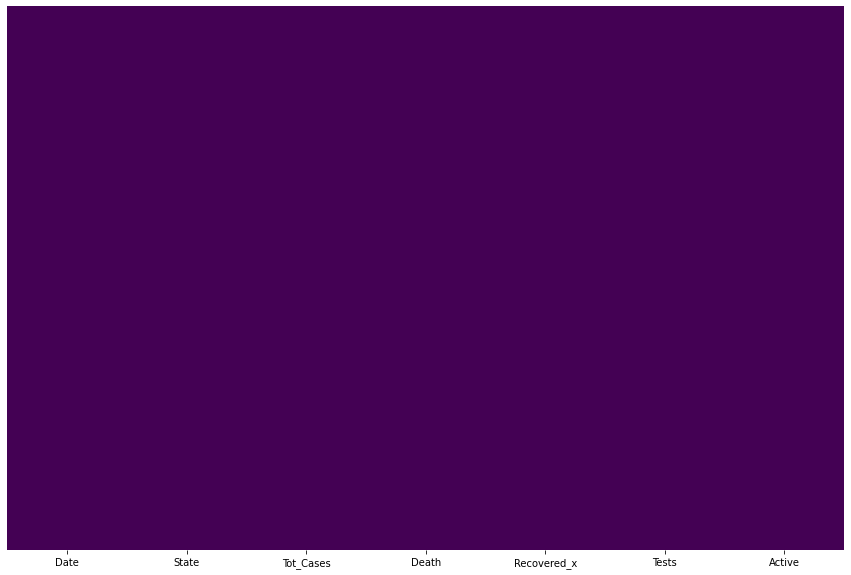

In [19]:
sns.heatmap(hm_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Caliculation Recovery Rate and Mortality Rate and adding both columns to the present Dataframe

In [20]:
hm_df['Mor_Rate'] = (hm_df['Death']/hm_df['Tot_Cases']).round(2)
hm_df['Rec_Rate'] = (hm_df['Recovered_x']/hm_df['Tot_Cases']).round(2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021684F667C8>,
      dtype=object)

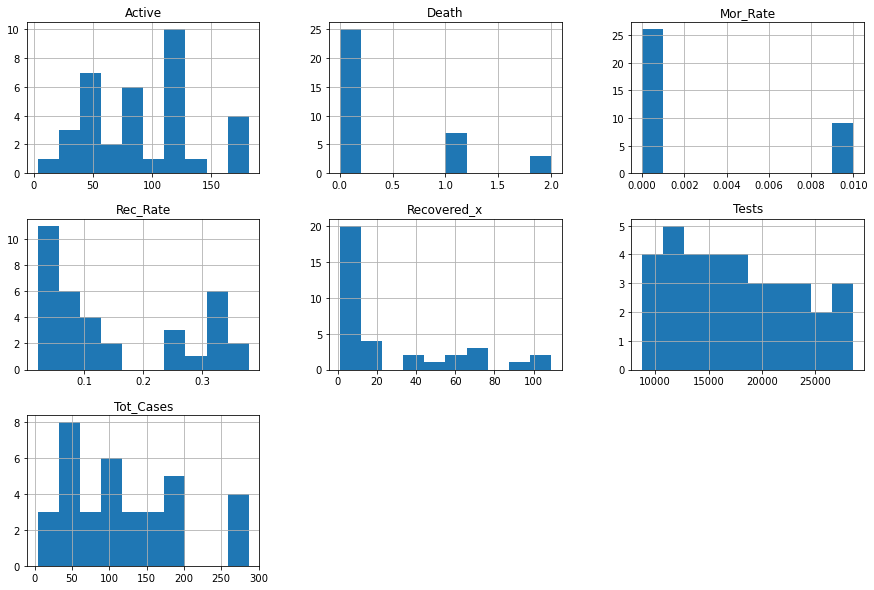

In [21]:
hm_df.head()
hm_df.hist()

# Cretaing Heatmap  for correlation of data 
# Question B

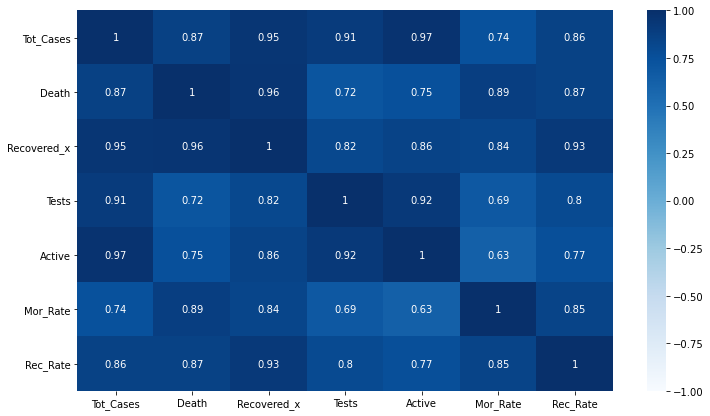

In [22]:
Var_Corr = hm_df.corr()
plt.figure(figsize=(12, 7))    
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, vmin=-1, vmax=1, center= 0,cmap='Blues')

Creating data for Linear Regression

In [23]:
mydataset=hm_df.loc[:,hm_df.columns]
mydataset['Tests']=mydataset['Tests'].astype('int')
mydataset.head()


,Date,State,Tot_Cases,Death,Recovered_x,Tests,Active,Mor_Rate,Rec_Rate
0,2020-06-01,Arunachal Pradesh,4,0,1,8768,3,0.0,0.25
1,2020-06-02,Arunachal Pradesh,22,0,1,9079,21,0.0,0.05
2,2020-06-03,Arunachal Pradesh,22,0,1,9551,21,0.0,0.05
3,2020-06-04,Arunachal Pradesh,38,0,1,10025,37,0.0,0.03
4,2020-06-05,Arunachal Pradesh,42,0,1,10790,41,0.0,0.02


preparing dataframes for X and Y axis

In [24]:
X=mydataset.iloc[:,2].values
X=X.reshape(-1,1)
Y=mydataset.iloc[:,5].values
Y

array([ 8768,  9079,  9551, 10025, 10790, 11261, 11516, 12012, 12455,
       13035, 13479, 14047, 14518, 17633, 15453, 16158, 16630, 16630,
       18008, 18521, 19154, 19799, 20398, 20938, 21274, 22623, 23011,
       23709, 24237, 25440, 25917, 26808, 28072, 28581, 17633])

In [25]:
Z=pd.DataFrame(X)
W=pd.DataFrame(Y)

In [26]:
labelencoder_X=preprocessing.LabelEncoder()
Y=labelencoder_X.fit_transform(Y)
Y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 16, 13, 14, 15,
       15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       16], dtype=int64)

Preparing training data as 80% and test data as 20% for predection

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [28]:
regressor=LinearRegression()

In [30]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [31]:
Y_pred=regressor.predict(X_test)
Y_pred

array([22.04166148,  9.70953691, 23.36660048,  3.90018898, 13.174762  ,
       22.5512534 , 17.25149739])

In [32]:
regressor.predict(X_train)

array([ 8.07884275,  7.7730876 ,  5.7347199 ,  5.7347199 ,  8.69035306,
       32.74309189, 17.65917093, 12.35941492, 12.76708846, 10.32104722,
       17.25149739, 13.58243554, 31.01047935, 29.88937711, 12.76708846,
       13.99010908,  9.30186337, 23.36660048, 21.02247763, 18.57643639,
        7.36541406,  9.30186337, 19.59562024, 31.62198966, 13.99010908,
        8.69035306,  8.28267952, 21.53206956])

In [33]:
X_train

array([[ 45],
       [ 42],
       [ 22],
       [ 22],
       [ 51],
       [287],
       [139],
       [ 87],
       [ 91],
       [ 67],
       [135],
       [ 99],
       [270],
       [259],
       [ 91],
       [103],
       [ 57],
       [195],
       [172],
       [148],
       [ 38],
       [ 57],
       [158],
       [276],
       [103],
       [ 51],
       [ 47],
       [177]], dtype=int64)

# Linear Regression for Question C

Blue line referes prediction line and red dots as training data points
Ploting Training data with respect to predection line

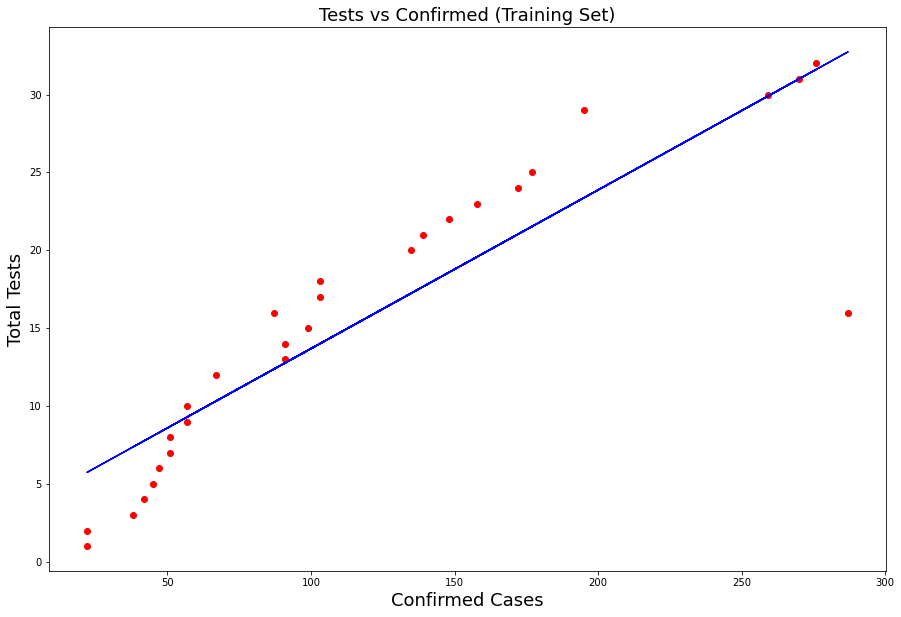

In [34]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Tests vs Confirmed (Training Set)',fontsize=18)
plt.xlabel('Confirmed Cases',fontsize=18)
plt.ylabel('Total Tests',fontsize=18)
plt.show()

Blue line referes prediction line and red dots as test data points
Ploting Test data with respect to predection line

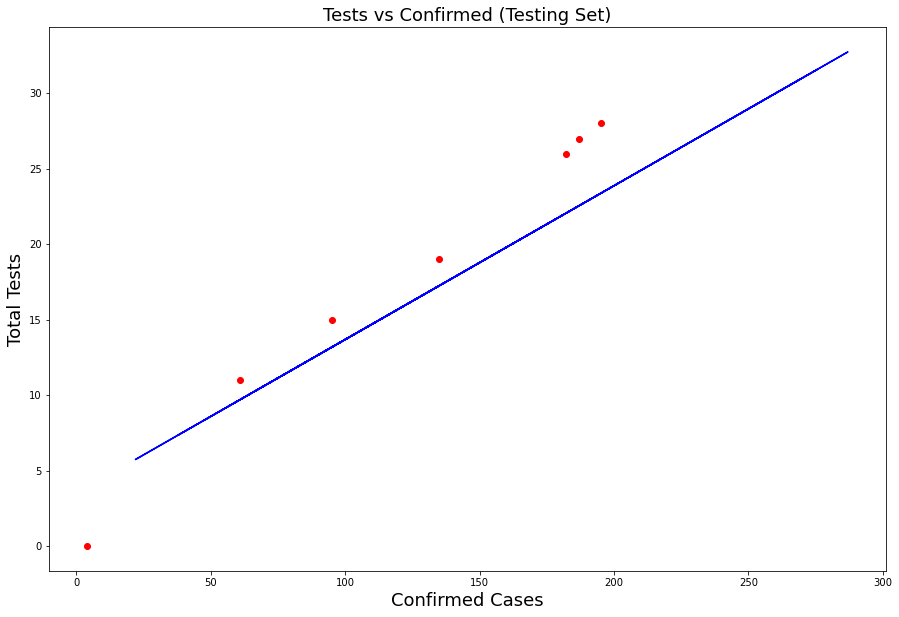

In [35]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Tests vs Confirmed (Testing Set)',fontsize=18)
plt.xlabel('Confirmed Cases',fontsize=18)
plt.ylabel('Total Tests',fontsize=18)
plt.show()

Considering 70% as training data and 30% as test data

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [38]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
Y_pred
regressor.predict(X_train)

array([ 8.50871054, 22.60843944,  8.10586115, 21.60131594, 14.65216385,
       33.18323611, 10.42224518,  9.41512169, 23.91769998, 13.04076626,
       13.44361566,  8.81084759, 14.65216385, 18.27780842, 23.91769998,
       31.47112617, 17.87495902, 20.19134306, 10.01939578,  6.49446356,
       10.01939578, 23.11200118, 32.07540027, 19.18421956])

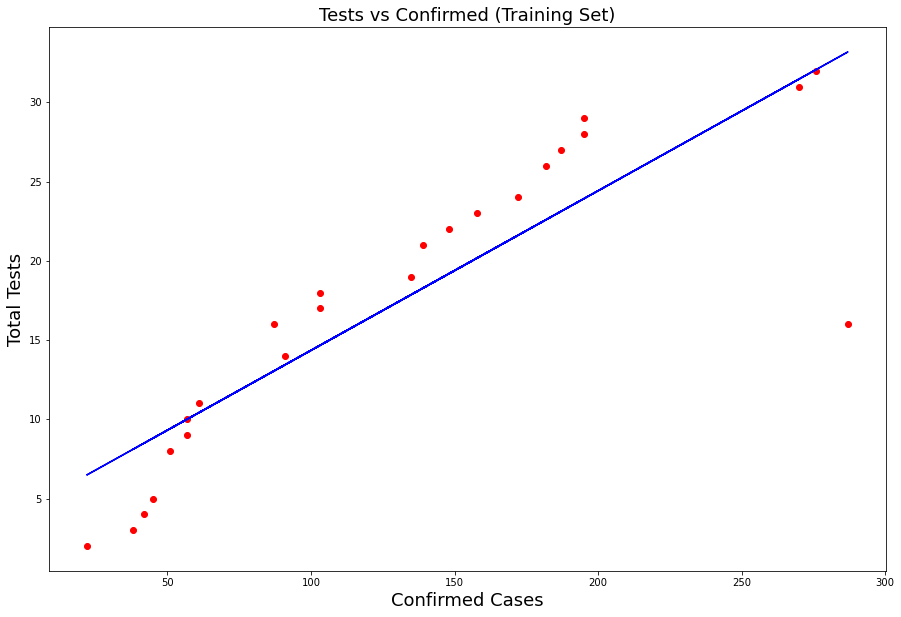

In [39]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Tests vs Confirmed (Training Set)',fontsize=18)
plt.xlabel('Confirmed Cases',fontsize=18)
plt.ylabel('Total Tests',fontsize=18)
plt.show()

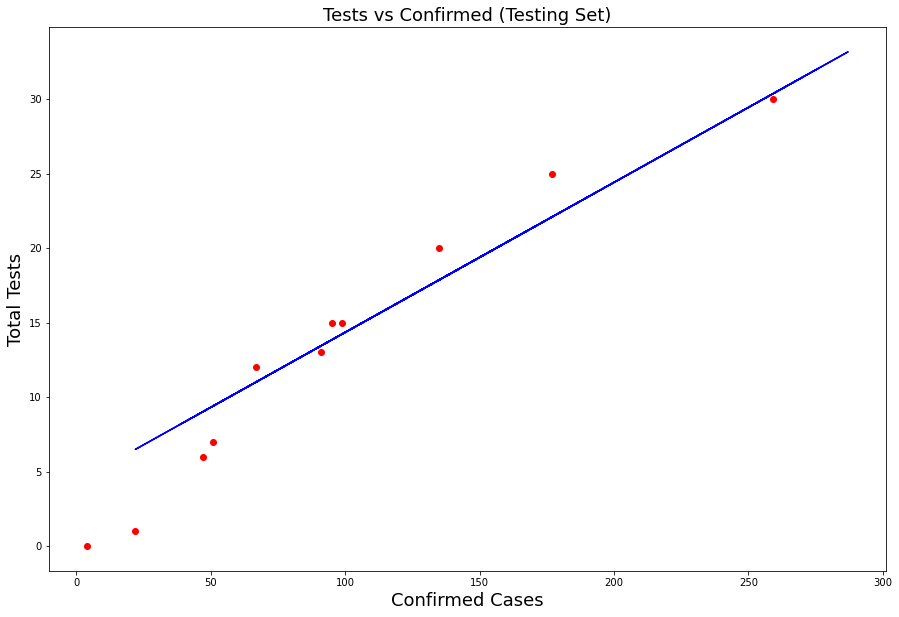

In [40]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Tests vs Confirmed (Testing Set)',fontsize=18)
plt.xlabel('Confirmed Cases',fontsize=18)
plt.ylabel('Total Tests',fontsize=18)
plt.show()

# Question D

In [41]:
df = pd.read_csv("PAML_COVID_Dataset.csv")

In [42]:
df=df.drop(["Date","Time","State","ConfirmedIndianNational","ConfirmedForeignNational"],axis=1)


In [43]:
df.info()
df=df.rename(columns={"Serious symptoms":"SS","Less common symptoms":"LCS","Most common symptoms":"MCS","Gend":"Gender","finalstatus":"Status"})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gend                  3135 non-null   object
 1   Age                   3135 non-null   int64 
 2   Serious symptoms      3135 non-null   object
 3   Less common symptoms  3135 non-null   object
 4   Most common symptoms  3135 non-null   object
 5   Severity              3135 non-null   object
 6   finalstatus           3135 non-null   object
dtypes: int64(1), object(6)
memory usage: 171.6+ KB


In [52]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = preprocessing.StandardScaler()
scaler.fit(df.drop('Status',axis=1))

StandardScaler()

In [55]:
df['Gender'] = np.where((df.Gender == 'Female'),0,df.Gender)
df['Gender'] = np.where((df.Gender == 'Male '),1,df.Gender)

df['SS'] = np.where((df.SS == 'sore throat'),0,df.SS)
df['SS'] = np.where((df.SS == 'chest pain or pressure'),1,df.SS)
df['SS'] = np.where((df.SS == 'difficulty breathing or shortness of breath'),2,df.SS)
df['SS'] = np.where((df.SS == 'loss of speech or movement'),3,df.SS)


df['LCS'] = np.where((df.LCS == 'loss of speech or movement'),0,df.LCS)
df['LCS'] = np.where((df.LCS == 'diarrhoea'),1,df.LCS)
df['LCS'] = np.where((df.LCS == 'conjunctivitis'),2,df.LCS)
df['LCS'] = np.where((df.LCS == 'headache'),3,df.LCS)
df['LCS'] = np.where((df.LCS == 'loss of taste or smell'),4,df.LCS)
df['LCS'] = np.where((df.LCS == 'aches and pains'),5,df.LCS)
df['LCS'] = np.where((df.LCS == 'a rash on skin, or discolouration of fingers or toes'),6,df.LCS)
df['LCS'] = np.where((df.LCS == 'sore throat'),7,df.LCS)

df['MCS'] = np.where((df.MCS == 'dry cough'),0,df.MCS)
df['MCS'] = np.where((df.MCS == 'fever'),1,df.MCS)
df['MCS'] = np.where((df.MCS == 'tiredness'),2,df.MCS)

df['Severity'] = np.where((df.Severity == 'Seviour'),0,df.Severity)
df['Severity'] = np.where((df.Severity == 'Mild'),1,df.Severity)
df['Severity'] = np.where((df.Severity == 'Moderate'),2,df.Severity)

df['Status'] = np.where((df.Status == 'Covid'),0,df.Status)
df['Status'] = np.where((df.Status == 'flu'),1,df.Status)

In [56]:
scaler.fit(df.drop('Status',axis=1))

StandardScaler()

In [57]:
scaled_features = scaler.transform(df.drop('Status',axis=1))

In [58]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Gender,Age,SS,LCS,MCS,Severity
0,-1.005437,1.662353,1.213978,1.483579,-1.240529,-1.246614
1,-1.005437,0.349317,-1.225651,-1.499437,-1.240529,-0.013764
2,0.994592,0.859942,-0.005836,-1.499437,-0.008645,-0.013764
3,-1.005437,-0.416621,-1.225651,-1.002268,-1.240529,1.219086
4,0.994592,-0.817826,-0.005836,-1.499437,-0.008645,-1.246614


In [59]:
X = df_feat[["Gender","Age","SS","LCS","MCS","Severity"]] .values  
X[0:5]
Y=df[["Status"]] .values 
Y=Y.astype('int')
Y[0:5]
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]
Y[0:5]

array([[0],
       [1],
       [1],
       [1],
       [0]])

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size=0.30, random_state=2)

In [61]:
knn = KNeighborsClassifier(n_neighbors=1)

In [62]:
knn.fit(X_train,Y_train.ravel())

KNeighborsClassifier(n_neighbors=1)

In [63]:
pred = knn.predict(X_test)

In [64]:
print(confusion_matrix(Y_test,pred))

[[226 241]
 [215 259]]


In [65]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.51      0.48      0.50       467
           1       0.52      0.55      0.53       474

    accuracy                           0.52       941
   macro avg       0.52      0.52      0.51       941
weighted avg       0.52      0.52      0.51       941



In [66]:

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

WITH K=1


[[226 241]
 [215 259]]


              precision    recall  f1-score   support

           0       0.51      0.48      0.50       467
           1       0.52      0.55      0.53       474

    accuracy                           0.52       941
   macro avg       0.52      0.52      0.51       941
weighted avg       0.52      0.52      0.51       941



F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# Dataset Source:- https://api.covid19india.org/csv/ , https://github.com/imdevskp/covid-19-india-data and https://www.kaggle.com/sudalairajkumar/covid19-in-india

# By H Rammohan